## Importing necessary libraries 

In [31]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

data = pd.read_csv('forestfires (1).csv',sep=',')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## Data Exploration

In [3]:
data.shape

(517, 31)

In [4]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
data.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [6]:
data.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [7]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

## Data Preparation

In [9]:
# As dummy variables are already created for month and day column, we can remove that column
data.drop(['month','day'],axis=1,inplace=True)

In [10]:
data.size_category.unique()

array(['small', 'large'], dtype=object)

In [11]:
le = LabelEncoder()
data['size_category'] = le.fit_transform(data['size_category'])

In [12]:
data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
dtype: object

In [13]:
data.size_category.unique()

array([1, 0])

In [14]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


## Model Building 

In [15]:
X = data.drop('size_category',axis= 1)
Y = data[['size_category']]

In [16]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)
x_scaled

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.20,random_state=12,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413, 1), (104, 1))

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(28, input_dim=28, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [46]:
# Compiling the model 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

## Model Training 

In [47]:
# Fit the model
model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
28/28 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.6594 - val_loss: 0.6322 - val_accuracy: 0.7080
Epoch 2/150
28/28 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7428 - val_loss: 0.6127 - val_accuracy: 0.7153
Epoch 3/150
28/28 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7500 - val_loss: 0.6039 - val_accuracy: 0.7153
Epoch 4/150
28/28 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7500 - val_loss: 0.6000 - val_accuracy: 0.7299
Epoch 5/150
28/28 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7681 - val_loss: 0.5883 - val_accuracy: 0.7372
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7826 - val_loss: 0.5786 - val_accuracy: 0.7518
Epoch 7/150
28/28 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7862 - val_loss: 0.5726 - val_accuracy: 0.7518
Epoch 8/150
2

## Model Testing 

In [48]:
#  prediction using training dataset
y_pedict_train = model.predict(x_train)
rounded = [round(x[0]) for x in y_pedict_train]

In [49]:
y_pedict_train1 = pd.DataFrame(rounded)

In [50]:
# prediction using testing dataset
y_pedict_test = model.predict(x_test)
rounded1 = [round(x[0]) for x in y_pedict_test]

In [51]:
y_pedict_test1 = pd.DataFrame(rounded1)

## Model Evaluation

In [52]:
accuracy1 = model.evaluate(x_train, y_pedict_train1,verbose=0)   
accuracy1

[0.013911301270127296, 1.0]

In [53]:
accuracy2 = model.evaluate(x_test, y_pedict_test1, verbose=0)
accuracy2

[0.023947540670633316, 1.0]

## Visualizing Accuracy and loss

In [28]:
history = model.fit(x_test, y_pedict_test1, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

In [29]:
# Visualize training history

# list all data in history

model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

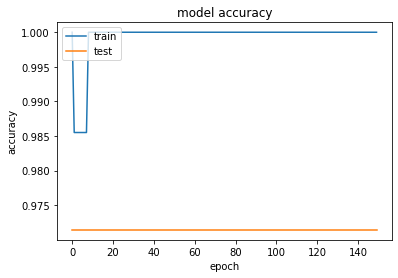

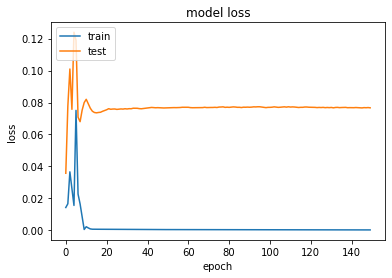

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Tuning of Hyperparameters :- Batch Size and Epochs

In [35]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [37]:
# create model 
def create_model():
    model1 = Sequential()
    model1.add(Dense(30, input_dim=28, activation='relu'))
    model1.add(Dense(28, activation='relu'))
    model1.add(Dense(1,activation='sigmoid'))
    
    model1.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model1

In [38]:
# Create the model
model2 = KerasClassifier(create_model, verbose = 0)
#Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
#Make a dictonary of grid search parameters
param_grid = dict(batch_size = batch_size,epochs=epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model2,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

In [39]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8789891362190246, using {'batch_size': 10, 'epochs': 100}
0.7530414223670959,0.051299814390658 with: {'batch_size': 10, 'epochs': 10}
0.8473993539810181,0.03147874734443163 with: {'batch_size': 10, 'epochs': 50}
0.8789891362190246,0.026270452156471242 with: {'batch_size': 10, 'epochs': 100}
0.7577725648880005,0.05731199034206623 with: {'batch_size': 20, 'epochs': 10}
0.8280340790748596,0.047948870740191205 with: {'batch_size': 20, 'epochs': 50}
0.8572142243385314,0.05378365765827631 with: {'batch_size': 20, 'epochs': 100}
0.7334998488426209,0.03798376489706694 with: {'batch_size': 40, 'epochs': 10}
0.779694390296936,0.03515258587293352 with: {'batch_size': 40, 'epochs': 50}
0.852394950389862,0.03905925903309182 with: {'batch_size': 40, 'epochs': 100}


### Hence, we can get the best score when the batch size is 10 and number of epochs are 100 

## Tuning of Hyperparameter :-Number of Neurons in activation layer

In [41]:
# Defining the model

def create_model1(neuron1,neuron2):
    model3 = Sequential()
    model3.add(Dense(neuron1, input_dim=28, activation='relu'))
    model3.add(Dense(neuron2, activation='relu'))
    model3.add(Dense(1,activation='sigmoid'))
    
    model3.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model3

In [43]:
# Create the model

model4 = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [24,28,35]
neuron2 = [20,24,28]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid1 = GridSearchCV(estimator = model4,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result1 = grid1.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 1/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   3.1s
[CV 2/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 2/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   3.2s
[CV 3/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 3/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   3.0s
[CV 4/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 4/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   3.2s
[CV 5/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 5/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   3.5s
[CV 1/5; 2/9] START neuron1=24, neuron2=24......................................
[CV 1/5; 2/9] END ....................neuron1=24,

In [44]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result1.best_score_,grid_result1.best_params_))
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8984131693840027, using {'neuron1': 28, 'neuron2': 24}
0.8667939901351929,0.03425355327998186 with: {'neuron1': 24, 'neuron2': 20}
0.8715545177459717,0.04152004463462875 with: {'neuron1': 24, 'neuron2': 24}
0.8813694000244141,0.020856822231810342 with: {'neuron1': 24, 'neuron2': 28}
0.8885982990264892,0.038080280514960096 with: {'neuron1': 28, 'neuron2': 20}
0.8984131693840027,0.028971739742265308 with: {'neuron1': 28, 'neuron2': 24}
0.8886276960372925,0.025934887803378662 with: {'neuron1': 28, 'neuron2': 28}
0.8619747281074523,0.029453286819559967 with: {'neuron1': 35, 'neuron2': 20}
0.8910373091697693,0.04060785362176442 with: {'neuron1': 35, 'neuron2': 24}
0.8886276721954346,0.03634958913531686 with: {'neuron1': 35, 'neuron2': 28}


### Hence, we can get best result when there are 28 neurons in the 1st layer and 24 neurons in the second layer with a score of 0.89

## Tuning of Hyperparameters:- Activation Function

In [60]:
# Defining the model

def create_model2(activation_function):
    model5 = Sequential()
    model5.add(Dense(28, input_dim=28, activation=activation_function))
    model5.add(Dense(24, activation=activation_function))
    model5.add(Dense(1,activation= 'sigmoid'))
    
    model5.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model5

In [63]:
# Create the model

model6 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function)

# Build and fit the GridSearchCV

grid2 = GridSearchCV(estimator = model6 ,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START activation_function=softmax.................................
[CV 1/5; 1/3] END ...............activation_function=softmax; total time=   3.3s
[CV 2/5; 1/3] START activation_function=softmax.................................
[CV 2/5; 1/3] END ...............activation_function=softmax; total time=   3.3s
[CV 3/5; 1/3] START activation_function=softmax.................................
[CV 3/5; 1/3] END ...............activation_function=softmax; total time=   3.1s
[CV 4/5; 1/3] START activation_function=softmax.................................
[CV 4/5; 1/3] END ...............activation_function=softmax; total time=   4.0s
[CV 5/5; 1/3] START activation_function=softmax.................................
[CV 5/5; 1/3] END ...............activation_function=softmax; total time=   4.0s
[CV 1/5; 2/3] START activation_function=relu....................................
[CV 1/5; 2/3] END ..................activation_fu

In [64]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9225389242172242, using {'activation_function': 'tanh'}
0.8014399170875549,0.05151291469446609 with: {'activation_function': 'softmax'}
0.8788715958595276,0.020593067880778703 with: {'activation_function': 'relu'}
0.9225389242172242,0.028271455921839467 with: {'activation_function': 'tanh'}
